#### Note: Latest May 21 (7.30pm) - OneHot Encoding (not...still get_dummies). Creating Kelly's 3 breed categories, only selecting top breeds (all others fall into "Other" category). Same thing with colors



## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

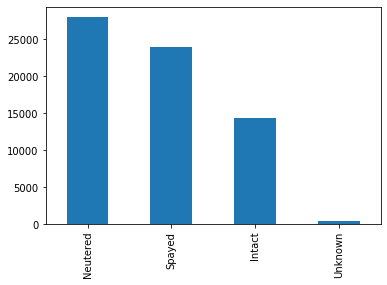

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [4]:
df.head()

Animal_ID     Name                DateTime               MonthYear  \
0   A805930  *Rachel         11/8/2019 18:37         11/8/2019 18:37   
1   A705114      NaN  06/13/2015 03:47:00 PM  06/13/2015 03:47:00 PM   
2   A680143      NaN  05/31/2014 11:21:00 AM  05/31/2014 11:21:00 AM   
3   A670236      NaN          1/5/2014 15:12          1/5/2014 15:12   
4   A811594      NaN          1/6/2020 17:09          1/6/2020 17:09   

  Date_of_Birth Outcome_Type Outcome_Subtype    Fixed     Sex  Age_numeric  \
0     9/11/2019     Adoption          Foster   Spayed  Female            1   
1     6/11/2015     Transfer         Partner   Intact    Male            2   
2    05/29/2014     Transfer         Partner   Intact    Male            2   
3      1/3/2014     Transfer         Partner  Unknown     NaN            2   
4      1/4/2020     Transfer         Partner   Intact  Female            2   

  Age_time  Age_month                   Breed            Color  
0    month   1.000000       Border Collie Mix  Chocolate/White  
1     days   0.066667     German Shepherd Mix            Brown  
2     days   0.066667  Labrador Retriever Mix      Black/White  
3     days   0.066667            Pit Bull Mix       Blue/White  
4     days   0.066667           Dachshund Mix            Brown

In [5]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [6]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [7]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' , 'Fixed'])

In [8]:
# df2.shape
df2.head()

Outcome_Type     Sex  Age_month                   Breed            Color
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White
1     Transfer    Male   0.066667     German Shepherd Mix            Brown
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White
3     Transfer     NaN   0.066667            Pit Bull Mix       Blue/White
4     Transfer  Female   0.066667           Dachshund Mix            Brown

In [9]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Sex", "Age_month", "Breed" ,"Color"]]

In [10]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 5)

In [11]:
# Have to fix the following columns "Sex"
df2 = df2.dropna(axis=0, subset=["Sex"])

In [12]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 5)

In [13]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)
df2.groupby('Outcome_Type').count()

Sex  Age_month  Breed  Color
Outcome_Type                                   
Adoption         31395      31395  31395  31395
Died               209        209    209    209
Disposal            22         22     22     22
Euthanasia        1694       1694   1694   1694
Missing             29         29     29     29
Return to Owner  18400      18400  18400  18400
Rto-Adopt          498        498    498    498
Transfer         14178      14178  14178  14178

In [14]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [15]:
# Verify shape
df3.shape

(48025, 5)

In [16]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('Outcome_Type').count()

Sex  Age_month  Breed  Color
Outcome_Type                                
Adoption      31395      31395  31395  31395
Died            209        209    209    209
Disposal         22         22     22     22
Euthanasia     1694       1694   1694   1694
Missing          29         29     29     29
Rto-Adopt       498        498    498    498
Transfer      14178      14178  14178  14178

In [17]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

In [18]:
df3.shape

(48025, 5)

In [19]:
df3.head()

Outcome_Type     Sex  Age_month                   Breed            Color
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White
1     Transfer    Male   0.066667     German Shepherd Mix            Brown
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White
4     Transfer  Female   0.066667           Dachshund Mix            Brown
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed.
#### Creating Kelly's 3 breed categories: 0 = mix, secondary not listed ; 1 = secondary breed listed; 2 = purebred

1. Create new MIX column (Kelly's 3 categories)
2. Split breed into breed_primary and breed_second


#### solution - Creating a Breed_category column AND Split into Breed_primary/Breed_second
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [20]:
# Make a copy and add new column called Breed_category, set all to PURE
df4 = df3.copy()
df4["Breed_category"]= "Prob_pure"
df4.head()

Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category  
0      Prob_pure  
1      Prob_pure  
2      Prob_pure  
4      Prob_pure  
6      Prob_pure

In [21]:
df4.shape

(48025, 6)

In [22]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category  
200                  Tan      Prob_pure  
201                  Tan      Prob_pure  
205          Brown/Black      Prob_pure  
206        Brown Brindle      Prob_pure  
208                White      Prob_pure  
209  Brown Brindle/White      Prob_pure  
210                White      Prob_pure

In [23]:
# Split Primary and Secondary
df4[['Breed_primary','Breed_second']] = df4.Breed.str.split("/", n=1, expand=True) 

In [24]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category       Breed_primary Breed_second  
200                  Tan      Prob_pure           Dachshund         None  
201                  Tan      Prob_pure           Dachshund         None  
205          Brown/Black      Prob_pure     German Shepherd   Rottweiler  
206        Brown Brindle      Prob_pure  Labrador Retriever     Pit Bull  
208                White      Prob_pure     Rat Terrier Mix         None  
209  Brown Brindle/White      Prob_pure  Labrador Retriever     Pit Bull  
210                White      Prob_pure     Rat Terrier Mix         None

In [25]:
# Find rows containing word "Mix" and set to 0
df4.loc[df4["Breed"].str.contains("Mix"), "Breed_category"] = "Mix"

In [26]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category       Breed_primary Breed_second  
200                  Tan      Prob_pure           Dachshund         None  
201                  Tan      Prob_pure           Dachshund         None  
205          Brown/Black      Prob_pure     German Shepherd   Rottweiler  
206        Brown Brindle      Prob_pure  Labrador Retriever     Pit Bull  
208                White            Mix     Rat Terrier Mix         None  
209  Brown Brindle/White      Prob_pure  Labrador Retriever     Pit Bull  
210                White            Mix     Rat Terrier Mix         None

In [27]:
# Find rows containing word "/" and set to 1
df4.loc[df4["Breed"].str.contains("\/"), "Breed_category"] = "Two"

In [28]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category       Breed_primary Breed_second  
200                  Tan      Prob_pure           Dachshund         None  
201                  Tan      Prob_pure           Dachshund         None  
205          Brown/Black            Two     German Shepherd   Rottweiler  
206        Brown Brindle            Two  Labrador Retriever     Pit Bull  
208                White            Mix     Rat Terrier Mix         None  
209  Brown Brindle/White            Two  Labrador Retriever     Pit Bull  
210                White            Mix     Rat Terrier Mix         None

In [29]:
# df4.groupby(['Mix']).count().sort_values("Breed", ascending=False).head(10)
# df4['Breed'].str.count('\/').sum()

In [30]:
# Double checking slashes with isalpha() - About the same number.  Off by 2 
# removing white spaces 
# df4["Breed"]= df4["Breed"].str.replace(" ", "") 
# df4.loc[180:190, :]


In [31]:
# creating bool series with new column 
# df4["bool_series2"]= df4["Breed"].str.isalpha()
# df4.loc[180:190, :]
# df4.groupby(['bool_series2']).count()

In [32]:
# print(f'Pure breed: {48025-34048-8480}')

In [33]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [34]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 371
# Breed_second - 163

len(df4.Breed_primary.value_counts())

371

In [35]:
# breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
# breed_top10primary

df4.Breed_primary.value_counts().sort_values(ascending=False).head(20)

Pit Bull Mix                 5440
Labrador Retriever Mix       4937
Chihuahua Shorthair Mix      4653
German Shepherd Mix          2094
Labrador Retriever           2084
Chihuahua Shorthair          1344
Australian Cattle Dog Mix    1132
German Shepherd              1019
Pit Bull                     1015
Dachshund Mix                 774
Border Collie Mix             681
Boxer Mix                     656
Dachshund                     553
Australian Cattle Dog         544
Miniature Poodle Mix          540
Catahoula Mix                 504
Australian Shepherd Mix       473
Staffordshire Mix             466
Pointer Mix                   429
Rat Terrier Mix               426
Name: Breed_primary, dtype: int64

In [36]:
breed_counts = df4['Breed_primary'].value_counts()
breed_counts

Pit Bull Mix                  5440
Labrador Retriever Mix        4937
Chihuahua Shorthair Mix       4653
German Shepherd Mix           2094
Labrador Retriever            2084
                              ... 
Greater Swiss Mountain Dog       1
Belgian Sheepdog                 1
Norwegian Elkhound Mix           1
Neapolitan Mastiff               1
Lowchen Mix                      1
Name: Breed_primary, Length: 371, dtype: int64

In [37]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category       Breed_primary Breed_second  
200                  Tan      Prob_pure           Dachshund         None  
201                  Tan      Prob_pure           Dachshund         None  
205          Brown/Black            Two     German Shepherd   Rottweiler  
206        Brown Brindle            Two  Labrador Retriever     Pit Bull  
208                White            Mix     Rat Terrier Mix         None  
209  Brown Brindle/White            Two  Labrador Retriever     Pit Bull  
210                White            Mix     Rat Terrier Mix         None

In [38]:
breed_others = set(breed_counts[breed_counts < 426].index)
df4['Top_breed'] = df4['Breed_primary'].replace(list(breed_others), 'Others')
# print(df4['Top_breed'].nunique())


In [39]:
df4.loc[200:210, :]

Outcome_Type     Sex  Age_month                        Breed  \
200     Transfer  Female        0.2                    Dachshund   
201     Transfer    Male        0.2                    Dachshund   
205     Transfer  Female        0.2   German Shepherd/Rottweiler   
206     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2              Rat Terrier Mix   
209     Transfer  Female        0.2  Labrador Retriever/Pit Bull   
210     Transfer    Male        0.2              Rat Terrier Mix   

                   Color Breed_category       Breed_primary Breed_second  \
200                  Tan      Prob_pure           Dachshund         None   
201                  Tan      Prob_pure           Dachshund         None   
205          Brown/Black            Two     German Shepherd   Rottweiler   
206        Brown Brindle            Two  Labrador Retriever     Pit Bull   
208                White            Mix     Rat Terrier Mix         None   
209  Brown Brindle/White            Two  Labrador Retriever     Pit Bull   
210                White            Mix     Rat Terrier Mix         None   

              Top_breed  
200           Dachshund  
201           Dachshund  
205     German Shepherd  
206  Labrador Retriever  
208     Rat Terrier Mix  
209  Labrador Retriever  
210     Rat Terrier Mix

In [40]:
# breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
# breed_top10second

# df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

# QUESTION!  Should you not use breed_second?

#### Handling Color - Option 1 (Grouping colors)
* How does option1 effect RF/LogReg models?


In [41]:
df4.head()

Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category           Breed_primary Breed_second               Top_breed  
0            Mix       Border Collie Mix         None       Border Collie Mix  
1            Mix     German Shepherd Mix         None     German Shepherd Mix  
2            Mix  Labrador Retriever Mix         None  Labrador Retriever Mix  
4            Mix           Dachshund Mix         None           Dachshund Mix  
6            Mix            Pit Bull Mix         None            Pit Bull Mix

In [42]:
# How many unique color combinations?  - 333
color_counts = df4['Color'].value_counts()
# len(color_counts)
print(df4['Color'].nunique())
color_counts.head(20)

333


Black/White            5911
Tan/White              2695
Brown/White            2655
Black                  2504
White                  2345
Tan                    2231
Tricolor               1957
Black/Tan              1903
Brown                  1877
White/Black            1721
Black/Brown            1645
White/Brown            1549
Brown Brindle/White    1426
Blue/White             1329
White/Tan              1296
Brown/Black            1256
Red                     914
Red/White               876
Tan/Black               788
Brown Brindle           757
Name: Color, dtype: int64

In [43]:
# # Handling "Color" Option 1
color_others = set(color_counts[color_counts < 756].index)
df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
print(df4['Top_colors'].nunique())

21


In [44]:
df4.head()


Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category           Breed_primary Breed_second               Top_breed  \
0            Mix       Border Collie Mix         None       Border Collie Mix   
1            Mix     German Shepherd Mix         None     German Shepherd Mix   
2            Mix  Labrador Retriever Mix         None  Labrador Retriever Mix   
4            Mix           Dachshund Mix         None           Dachshund Mix   
6            Mix            Pit Bull Mix         None            Pit Bull Mix   

    Top_colors  
0       Others  
1        Brown  
2  Black/White  
4        Brown  
6       Others

In [45]:
# # Add new column called Color_new and set to Color
# df5 = df4.copy()
# df5["Color_new"]=df4["Color"]
# df5.head()
# df5.loc[320:330, :]

In [46]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan column


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

In [47]:
# Split Top_color column into color1, color2
# df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [48]:
# df3.loc[150:160, :]

In [49]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
# len(df3.Color2.value_counts())

In [50]:
# color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
# color_top10Color1

# df3.Color1.value_counts().sort_values(ascending=False).head(40)

In [51]:
# color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
# color_top10Color2

# df3.Color2.value_counts().sort_values(ascending=False).head(40)

# QUESTION!  Should you simplify the color intake?  

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [52]:
df4.head()

Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category           Breed_primary Breed_second               Top_breed  \
0            Mix       Border Collie Mix         None       Border Collie Mix   
1            Mix     German Shepherd Mix         None     German Shepherd Mix   
2            Mix  Labrador Retriever Mix         None  Labrador Retriever Mix   
4            Mix           Dachshund Mix         None           Dachshund Mix   
6            Mix            Pit Bull Mix         None            Pit Bull Mix   

    Top_colors  
0       Others  
1        Brown  
2  Black/White  
4        Brown  
6       Others

In [53]:
df4['Pet_age_category'] = pd.cut(x=df4['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [54]:
df4.loc[50000:50020, :]
df4.tail()

Outcome_Type     Sex  Age_month                                Breed  \
66772   Euthanasia    Male      216.0              Miniature Schnauzer Mix   
66774     Adoption    Male      216.0               Chihuahua Longhair Mix   
66786   Euthanasia  Female      228.0                     Miniature Poodle   
66787     Transfer    Male      228.0              Chihuahua Shorthair Mix   
66790   Euthanasia  Female      228.0  Chihuahua Longhair/Miniature Poodle   

           Color Breed_category            Breed_primary      Breed_second  \
66772       Gray            Mix  Miniature Schnauzer Mix              None   
66774  White/Tan            Mix   Chihuahua Longhair Mix              None   
66786      White      Prob_pure         Miniature Poodle              None   
66787      Brown            Mix  Chihuahua Shorthair Mix              None   
66790      White            Two       Chihuahua Longhair  Miniature Poodle   

                     Top_breed Top_colors Pet_age_category  
66772                   Others     Others           Senior  
66774                   Others  White/Tan           Senior  
66786                   Others      White           Senior  
66787  Chihuahua Shorthair Mix      Brown           Senior  
66790                   Others      White           Senior

In [55]:
# What's the breakdown by Pet_age_category after binning??
df4.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

Young     22342
Baby      13355
Adult      9249
Senior     3077
Name: Pet_age_category, dtype: int64

In [56]:
df4.dtypes

Outcome_Type          object
Sex                   object
Age_month            float64
Breed                 object
Color                 object
Breed_category        object
Breed_primary         object
Breed_second          object
Top_breed             object
Top_colors            object
Pet_age_category    category
dtype: object

In [57]:
df4['Pet_age_category'] = df4.Pet_age_category.astype(object)

In [58]:
df4.dtypes

Outcome_Type         object
Sex                  object
Age_month           float64
Breed                object
Color                object
Breed_category       object
Breed_primary        object
Breed_second         object
Top_breed            object
Top_colors           object
Pet_age_category     object
dtype: object

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [59]:
# Create new BINARY_OUTCOME column and set to 0

df4["Binary_outcome"]="Negative"
df4.head()

Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category           Breed_primary Breed_second               Top_breed  \
0            Mix       Border Collie Mix         None       Border Collie Mix   
1            Mix     German Shepherd Mix         None     German Shepherd Mix   
2            Mix  Labrador Retriever Mix         None  Labrador Retriever Mix   
4            Mix           Dachshund Mix         None           Dachshund Mix   
6            Mix            Pit Bull Mix         None            Pit Bull Mix   

    Top_colors Pet_age_category Binary_outcome  
0       Others             Baby       Negative  
1        Brown             Baby       Negative  
2  Black/White             Baby       Negative  
4        Brown             Baby       Negative  
6       Others             Baby       Negative

In [60]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = "Positive"

In [61]:
df4.loc[200:300, :]

Outcome_Type     Sex  Age_month                         Breed  \
200     Transfer  Female        0.2                     Dachshund   
201     Transfer    Male        0.2                     Dachshund   
205     Transfer  Female        0.2    German Shepherd/Rottweiler   
206     Transfer  Female        0.2   Labrador Retriever/Pit Bull   
208     Transfer  Female        0.2               Rat Terrier Mix   
..           ...     ...        ...                           ...   
296     Transfer  Female        1.0           German Shepherd Mix   
297     Transfer    Male        1.0     Australian Cattle Dog Mix   
298     Adoption  Female        1.0        Labrador Retriever Mix   
299     Transfer    Male        1.0      Jack Russell Terrier Mix   
300     Adoption    Male        1.0  Labrador Retriever/Blue Lacy   

                 Color Breed_category              Breed_primary Breed_second  \
200                Tan      Prob_pure                  Dachshund         None   
201                Tan      Prob_pure                  Dachshund         None   
205        Brown/Black            Two            German Shepherd   Rottweiler   
206      Brown Brindle            Two         Labrador Retriever     Pit Bull   
208              White            Mix            Rat Terrier Mix         None   
..                 ...            ...                        ...          ...   
296              Brown            Mix        German Shepherd Mix         None   
297  Cream/Brown Merle            Mix  Australian Cattle Dog Mix         None   
298                Tan            Mix     Labrador Retriever Mix         None   
299              Sable            Mix   Jack Russell Terrier Mix         None   
300          Tan/White            Two         Labrador Retriever    Blue Lacy   

                     Top_breed     Top_colors Pet_age_category Binary_outcome  
200                  Dachshund            Tan             Baby       Negative  
201                  Dachshund            Tan             Baby       Negative  
205            German Shepherd    Brown/Black             Baby       Negative  
206         Labrador Retriever  Brown Brindle             Baby       Negative  
208            Rat Terrier Mix          White             Baby       Negative  
..                         ...            ...              ...            ...  
296        German Shepherd Mix          Brown             Baby       Negative  
297  Australian Cattle Dog Mix         Others             Baby       Negative  
298     Labrador Retriever Mix            Tan             Baby       Positive  
299                     Others         Others             Baby       Negative  
300         Labrador Retriever      Tan/White             Baby       Positive  

[90 rows x 12 columns]

## Still get_dummies

In [62]:
df4.head()

Outcome_Type     Sex  Age_month                   Breed            Color  \
0     Adoption  Female   1.000000       Border Collie Mix  Chocolate/White   
1     Transfer    Male   0.066667     German Shepherd Mix            Brown   
2     Transfer    Male   0.066667  Labrador Retriever Mix      Black/White   
4     Transfer  Female   0.066667           Dachshund Mix            Brown   
6     Transfer  Female   0.066667            Pit Bull Mix  Chocolate/White   

  Breed_category           Breed_primary Breed_second               Top_breed  \
0            Mix       Border Collie Mix         None       Border Collie Mix   
1            Mix     German Shepherd Mix         None     German Shepherd Mix   
2            Mix  Labrador Retriever Mix         None  Labrador Retriever Mix   
4            Mix           Dachshund Mix         None           Dachshund Mix   
6            Mix            Pit Bull Mix         None            Pit Bull Mix   

    Top_colors Pet_age_category Binary_outcome  
0       Others             Baby       Positive  
1        Brown             Baby       Negative  
2  Black/White             Baby       Negative  
4        Brown             Baby       Negative  
6       Others             Baby       Negative

In [63]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2
df5 = df4.drop(columns=['Outcome_Type','Age_month', 'Breed', 'Color', 'Breed_primary','Breed_second'])

# QUESTION!  
1. Should be take out BREED_SECOND? - Dont get_dummy Breed_second
2. Should be take out COLOR2?

In [64]:
df5.head()

Sex Breed_category               Top_breed   Top_colors  \
0  Female            Mix       Border Collie Mix       Others   
1    Male            Mix     German Shepherd Mix        Brown   
2    Male            Mix  Labrador Retriever Mix  Black/White   
4  Female            Mix           Dachshund Mix        Brown   
6  Female            Mix            Pit Bull Mix       Others   

  Pet_age_category Binary_outcome  
0             Baby       Positive  
1             Baby       Negative  
2             Baby       Negative  
4             Baby       Negative  
6             Baby       Negative

In [65]:
df5.apply(lambda x: sum(x.isnull()/len(df5)))

Sex                 0.000000
Breed_category      0.000000
Top_breed           0.000000
Top_colors          0.000000
Pet_age_category    0.000042
Binary_outcome      0.000000
dtype: float64

In [66]:
df5 = df5.dropna(axis=0, subset=["Pet_age_category"])

In [67]:
df5.apply(lambda x: sum(x.isnull()/len(df5)))
df5.shape

(48023, 6)

In [68]:
df6_sample = df5.sample(n=1000, random_state=42)

In [69]:
df6_sample.head()

Sex Breed_category                Top_breed   Top_colors  \
19766  Female      Prob_pure      Chihuahua Shorthair     Tricolor   
43138  Female            Mix             Pit Bull Mix  Brown/White   
12770  Female            Mix  Chihuahua Shorthair Mix    Tan/White   
63261  Female            Mix  Chihuahua Shorthair Mix    Black/Tan   
45732    Male            Mix                   Others       Others   

      Pet_age_category Binary_outcome  
19766             Baby       Negative  
43138            Young       Positive  
12770             Baby       Positive  
63261           Senior       Positive  
45732            Adult       Negative

### Encoder()

In [70]:

# Label Encoder
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df6_sample.apply(LabelEncoder().fit_transform)


Sex  Breed_category  Top_breed  Top_colors  Pet_age_category  \
19766    0               1          6          16                 1   
43138    0               0         17           9                 3   
12770    0               0          7          15                 1   
63261    0               0          7           2                 2   
45732    1               0         15          10                 0   
...    ...             ...        ...         ...               ...   
1261     1               0         15          10                 1   
63356    0               0         15           1                 2   
1911     1               0         15          10                 1   
5118     1               0         15          10                 1   
36313    0               2          8          16                 3   

       Binary_outcome  
19766               0  
43138               1  
12770               1  
63261               1  
45732               0  
...               ...  
1261                0  
63356               0  
1911                0  
5118                1  
36313               1  

[1000 rows x 6 columns]

In [71]:
X = df6_sample.drop("Binary_outcome", axis=1)

In [72]:
y = df6_sample["Binary_outcome"]
y.shape

(1000,)

In [81]:
df52= df5.apply(LabelEncoder().fit_transform)

In [82]:
Xf = df52.drop("Binary_outcome", axis=1)
Xf.head()

Sex  Breed_category  Top_breed  Top_colors  Pet_age_category
0    0               0          3          10                 1
1    1               0         11           5                 1
2    1               0         13           3                 1
4    0               0          9           5                 1
6    0               0         17          10                 1

In [76]:
Xf.apply(lambda x: sum(x.isnull()/len(Xf)))

Sex                 0.0
Breed_category      0.0
Top_breed           0.0
Top_colors          0.0
Pet_age_category    0.0
dtype: float64

In [84]:
yf = df52["Binary_outcome"]
yf.head()

0    1
1    0
2    0
4    0
6    0
Name: Binary_outcome, dtype: int32

### get_dummies


In [ ]:
# V1 - all in
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Breed_second', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V2 - took out 'Breed_second'
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V3 - took out 'Breed_second' AND 'Color2'   
# df6 = pd.get_dummies(df5[['Sex', 'Breed_category','Top_breed', 'Top_colors', 'Pet_age_category', 'Binary_outcome']])
# df6.head()

In [ ]:
# df6.info()

In [ ]:
# # Define X and y
# X = df6.drop(['Binary_outcome_Negative', 'Binary_outcome_Positive', 'Sex_Female', 'Breed_category_Mix','Top_breed_Australian Cattle Dog', 'Top_colors_White','Pet_age_category_Baby'], axis="columns")
# y = df6[['Binary_outcome_Positive']]

In [ ]:
# X.shape

In [ ]:
# y.shape

## Random Forest model


In [ ]:
# # Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# # Import, initialize, fit and predict
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
# rf_model.fit(X_train, y_train)
# predict_y_test = rf_model.predict(X_test)

In [ ]:
# # Validate - run accuracy score
# from sklearn import metrics
# print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

In [ ]:
# # RF Feature importance?
# feature_list = list(X.columns)
# feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
# print(feature_importance[0:10])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# model_params = {
#     'n_estimators': [50, 150, 250],
#     'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
#     'min_samples_split': [2, 4, 6]
# }

In [ ]:
# # create random forest classifier model
# rf_model2 = RandomForestClassifier(random_state=1)

# # set up grid search meta-estimator
# clf = GridSearchCV(rf_model2, model_params, cv=5)

# # train the grid search meta-estimator to find the best model
# model = clf.fit(X_train, y_train)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [ ]:
# best_result = model.best_score_
# print(best_result)

In [ ]:
# # Validate with cross validation

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
# print(scores)

In [ ]:
# scores.mean()

## SVM


In [ ]:
#  # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))

In [ ]:
# # Uncomment to run Grid Serach on smaller dataset to find parameters

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  

# from sklearn.svm import SVC 
# svc = SVC(C=1e-9, kernel='rbf')
# svc.fit(X_train, y_train)

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# # Code adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
# # Set the parameters by cross-validation
# def gridsearch(X_train, y_train, X_test, y_test):
    
#     tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9],
#                      'C': [1, 10, 100, 1000, 10000]}]

#     scores = ['precision', 'recall']

#     for score in scores:
#         print("# Tuning hyper-parameters for %s" % score)
#         print()

#         clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
#                            scoring='%s_macro' % score)
#         clf.fit(X_train, y_train)

#         print("Best parameters set found on development set:")
#         print()
#         print(clf.best_params_)
#         print()
#         print("Grid scores on development set:")
#         print()
#         means = clf.cv_results_['mean_test_score']
#         stds = clf.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#             print("%0.3f (+/-%0.03f) for %r"
#                   % (mean, std * 2, params))
#         print()

#         print("Detailed classification report:")
#         print()
#         print("The model is trained on the full development set.")
#         print("The scores are computed on the full evaluation set.")
#         print()
#         y_true, y_pred = y_test, clf.predict(X_test)
#         print(classification_report(y_true, y_pred))
#         print()

In [87]:
## Grid Search on the smaller dataset (1000), pass in (X_train, y_train, X_test, y_test) or whatever variables you chose to name it
## When this is done, you will find the optimum C, gamma, kernel info - pass that into the new model

# gridsearch(X_train, y_train, X_test, y_test)

In [85]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,random_state=42) 

svc = SVC(C=10000, gamma=0.001, kernel='rbf')
svc.fit(Xf_train, yf_train)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
svc.score(Xf_test, yf_test)

0.6497584541062802